<a href="https://colab.research.google.com/github/gohibi/pythonbases/blob/main/lab1%26lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats
from scipy.stats import chi2
import math

In [46]:
X=pd.Series([21,29,27,29,27,29,31,29,31,29,
   29,23,39,31,29,31,29,31,29,31,
   33,31,31,31,27,23,27,33,29,25,
   29,19,29,31,23,31,29,27,33,29,
   31,29,31,23,35,27,29,29,27,29,
   29,21,29,27,29,29,29,33,29,25,
   25,27,31,29,29,27,33,29,31,29,
   29,29,35,27,29,35,29,33,29,27,
   31,31,27,29,35,27,33,29,27,29,
   25,27,31,37,25,31,27,27,29,25])


квартили

In [47]:
Q1=np.quantile(X,0.25)
print('Q1 =' ,Q1,'\n')
Q3=np.quantile(X,0.75)
print('Q3 =' ,Q3,'\n')


Q1 = 27.0 

Q3 = 31.0 



межквартильный интервал


In [48]:
IQR=Q3 - Q1
print('IQR = ',IQR)

IQR =  4.0


убрать выбросы.


In [49]:
X= X[~((X < (Q1 - 1.5 * IQR)) |(X > (Q3 + 1.5 * IQR)))] #remove outlier from quartile

In [50]:
n=len(X) #length of serie
print('length serie n = ', n , '\n')

length serie n =  98 



In [51]:
Xmax = np.max(X)
print('Xmax =' , Xmax ,'\n')

Xmax = 37 



In [52]:
Xmin=np.min(X)
print('Xmin =' , Xmin ,'\n')

Xmin = 21 



In [53]:
R =Xmax - Xmin #Размах
print('Размах R = ', R , '\n')

Размах R =  16 



In [54]:
k= np.sqrt(n) #Часто
print('k =', round(k,2), '\n')

k = 9.9 



In [55]:
h=round(R/k,2)  #длина
print('длина h =', h ,'\n')

длина h = 1.62 



In [56]:
x0 =Xmin - 0.5*h
print( 'x0 =',round(x0,2),'\n')

x0 = 20.19 



In [57]:
xk = Xmax + 0.5*h
print( 'xk =',round(xk,2),'\n')

xk = 37.81 



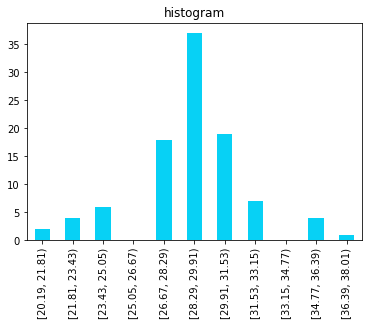

In [58]:
bin_range = np.arange(x0 , xk+h , h)
out, bins  = pd.cut(X, bins=bin_range, include_lowest=True, right=False, retbins=True)
out.value_counts(sort=False).plot.bar(color='#07d1f5', title='histogram')


In [59]:
display(out.value_counts(sort=False, ascending=False))

[20.19, 21.81)     2
[21.81, 23.43)     4
[23.43, 25.05)     6
[25.05, 26.67)     0
[26.67, 28.29)    18
[28.29, 29.91)    37
[29.91, 31.53)    19
[31.53, 33.15)     7
[33.15, 34.77)     0
[34.77, 36.39)     4
[36.39, 38.01)     1
dtype: int64

**Дискретный вариационный ряд**

In [60]:
data={'xi':[21,22.62,24.24,25.86,27.48,29.1,30.72,32.34,33.96,35.58,37.2],
      'ni':[2,4,6,0,18,37,19,7,0,4,1]}

In [37]:
df =pd.DataFrame(data) #Дискретный вариационный ряд
display(df)

,xi,ni
0,21.00,2
1,22.62,4
2,24.24,6
3,25.86,0
4,27.48,18
5,29.10,37
6,30.72,19
7,32.34,7
8,33.96,0
9,35.58,4


Text(0.5, 1.0, 'Polygon')

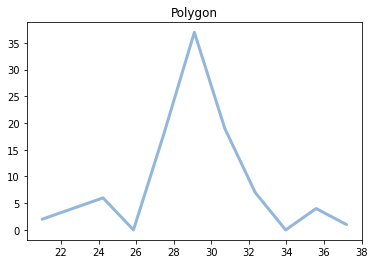

In [61]:
_,ax = plt.subplots()
ax.plot(df['xi'], df['ni'], color='#6699cc', alpha=0.7,
    linewidth=3, solid_capstyle='round', zorder=2)
ax.set_title('Polygon')

**Построить график накопительных частот— кумуляту.**

In [62]:
data1={'xi':[21,22.62,24.24,25.86,27.48,29.1,30.72,32.34,33.96,35.58,37.2],
      'ni':[2,4,6,0,18,37,19,7,0,4,1],
      'fi':[0.02,0.041,0.061,0,0.184,0.378,0.194,0.071,0,0.041,0.01],
      'cfi':[0.02,0.061,0.122,0.122,0.306,0.684,0.878,0.949,0.949,0.99,1]}

In [41]:
df1 =pd.DataFrame(data1)
display(df1)

,xi,ni,fi,cfi
0,21.00,2,0.020,0.020
1,22.62,4,0.041,0.061
2,24.24,6,0.061,0.122
3,25.86,0,0.000,0.122
4,27.48,18,0.184,0.306
5,29.10,37,0.378,0.684
6,30.72,19,0.194,0.878
7,32.34,7,0.071,0.949
8,33.96,0,0.000,0.949
9,35.58,4,0.041,0.990


Text(0.5, 1.0, 'cumulate')

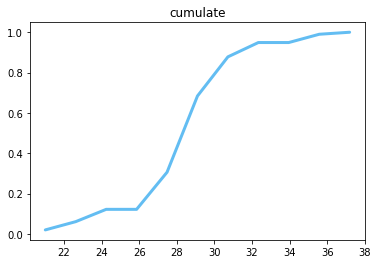

In [63]:
_,ax = plt.subplots()
ax.plot(df1['xi'], df1['cfi'], color='#21a2ed', alpha=0.7,
    linewidth=3, solid_capstyle='round', zorder=2)
ax.set_title('cumulate')

**Вычислить статистики:**

моду

In [64]:
Xmode=X.mode(dropna=True)
print('Mode =',Xmode ,'\n')

Mode = 0    29
dtype: int64 



медиану

In [65]:

md_X=X.median(skipna=True)
print('Median = ',round(md_X,3) , '\n')

Median =  29.0 




выборочную среднюю

In [66]:
mean_X=X.mean()
print('Mean = ',round(mean_X,3) , '\n')

Mean =  28.98 



выборочную дисперсию

In [67]:
var_X=X.var()
print('Variance =', round(var_X,3) , '\n')

Variance = 8.618 



выборочное среднее квадратическое отклонение

In [68]:
std_X=X.std()
print('Standard Deviation sigma= ', round(std_X,3) , '\n')

Standard Deviation sigma=  2.936 



коэффициент вариации

In [69]:
cv_X=std_X/mean_X*100
print('the coefficient of variation cv =',round(cv_X,3),'\n')

the coefficient of variation cv = 10.13 



асимметрию

In [70]:
skew_X=X.skew(skipna=True)
print('Asymmetry As =', round(skew_X,3), '\n')

Asymmetry As = -0.162 



эксцесс

In [71]:
kurt_X=X.kurt()
print('Excess Ex =', round(kurt_X,3), '\n')

Excess Ex = 0.824 



Построить доверительные интервалы для истинного значения измеряемой величины и среднего квадратического отклонения генеральной совокупности

Для математического ожидания

In [72]:
s=X.std()
xba=X.mean()
n=len(X)
gamma=0.95
t=1.98472    #=TINV(0,05; 97) по экселе
left_m=round(xba-t*(s/math.sqrt(n)),3)
right_m=round(xba+t*(s/math.sqrt(n)),3)
print('Confidence interval of mathematical expectation ', left_m ,'< m <', right_m)

Confidence interval of mathematical expectation  28.391 < m < 29.568


для среднего квадратического отклонения

In [73]:
ki1_right=73.361   # CHIINV(1,95/2;99) по эксель
ki2_left=128.241   # CHIINV(0,05/2;99) по эксель
sigm_left=(((n-1)*(s*s))/ki2_left)
sigm_right=(((n-1)*(s*s))/ki1_right)
print('Confidence interval of standard deviation',sigm_left ,'< s^2 <', sigm_right)


Confidence interval of standard deviation 6.518657712225187 < s^2 < 11.395144336547624


In [ ]:
print('******************************************** LAB 2 *********************************************************')

**LAB 2**

1.Построить эмпирическую (полигон) и теоретическую (нормальную) кривую распределения.


,xi,ni,xi-x,ui,fi(ui),yi,ni'
0,21.00,2,-7.98,-2.717984,0.009925,0.536703,1
1,22.62,4,-6.36,-2.166213,0.038190,2.065079,2
2,24.24,6,-4.74,-1.614441,0.108376,5.860274,6
3,25.86,0,-3.12,-1.062670,0.226826,12.265285,12
4,27.48,18,-1.50,-0.510899,0.350131,18.932840,19
5,29.10,37,0.12,0.040872,0.398609,21.554222,22
6,30.72,19,1.74,0.592643,0.334690,18.097867,18
7,32.34,7,3.36,1.144414,0.207260,11.207297,11
8,33.96,0,4.98,1.696185,0.094660,5.118619,5
9,35.58,4,6.60,2.247956,0.031886,1.724182,2


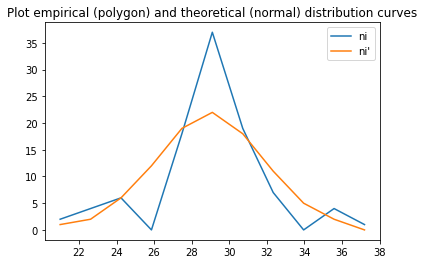

In [74]:
print('1.Построить эмпирическую (полигон) и теоретическую (нормальную) кривую распределения.')
pd.set_option('max_columns', None)
pd.set_option('max_rows',None)
data = pd.DataFrame(pd.read_excel("donnees2.xlsm" , sheet_name="donnees"))
display(data)
print()
_,ax = plt.subplots()
ax.plot(data['xi'], data['ni'])
ax.plot(data['xi'], data["ni'"])
ax.legend(["ni", "ni'"])
ax.set_title('Plot empirical (polygon) and theoretical (normal) distribution curves')
print()

In [75]:
print('a-Пирсона')
pearson=pd.DataFrame(pd.read_excel("donnees2.xlsm",sheet_name="pearson"))
display(pearson)
print()
alpha=0.95
f=len(pearson)-2-1
print(f)
KhiВ = pearson['(nk-npk)^2/npk'].values.sum()
Fchi2=chi2.ppf(alpha,f)
if KhiВ < Fchi2:
  print('Гипотеза H0 принимаем :' , KhiВ, '<', Fchi2)
else:
  print('Гипотеза H0 отклоняем :' , KhiВ , '>=', Fchi2)
print()

a-Пирсона


,ni,левая,правая,p,npk,(nk-npk)^2/npk
0,12,20.19,26.67,0.214327,21.004009,3.860
1,18,26.67,28.29,0.191395,18.756723,0.031
2,37,28.29,29.91,0.217187,21.284337,11.604
3,19,29.91,31.53,0.183161,17.949808,0.061
4,12,31.53,38.01,0.191502,18.767211,2.440



2
Гипотеза H0 отклоняем : 17.996 >= 5.991464547107979



In [76]:
#print('б-Колмогорова')
kolmogorov =pd.DataFrame(pd.read_excel("donnees2.xlsm",sheet_name="kolmorogov"))
display(kolmogorov)
lambdax=kolmogorov["|wi-wi'|"].values.max()/math.sqrt(n)
print()
print('lambda = ', round(lambdax,3),'\n') 
Klbd =0.8643          #по таблицы K(lambda)
print('Klambda =' , Klbd , ' >' , 0.05 ,'Это условие выполняется.')
print('Гипотезу о соответствии данного распределения нормальному закону распределения принимаем')
print()


,xi,ni,ni',wi,wi',|wi-wi'|
0,21.00,2,1,2,1,1
1,22.62,4,2,6,3,3
2,24.24,6,6,12,9,3
3,25.86,0,12,12,21,9
4,27.48,18,19,30,40,10
5,29.10,37,22,67,62,5
6,30.72,19,18,86,80,6
7,32.34,7,11,93,91,2
8,33.96,0,5,93,96,3
9,35.58,4,2,97,98,1



lambda =  1.01 

Klambda = 0.8643  > 0.05 Это условие выполняется.
Гипотезу о соответствии данного распределения нормальному закону распределения принимаем



In [77]:

print('в-Романовского')
print()
if (abs(KhiВ - f)/(math.sqrt(2*f))) >= 3:
  print('Гипотеза H0 отвергается , т.е. оно больше 3 :',abs(KhiВ - f)/(math.sqrt(2*f) ))
else:
  print('Гипотеза H0 не отвергается ,  т.е. оно меньше 3 :',abs(KhiВ - f)/(math.sqrt(2*f)))
print()


в-Романовского

Гипотеза H0 отвергается , т.е. оно больше 3 : 7.997999999999999



In [78]:
print('г-Ястремского')
yastremski=pd.DataFrame(pd.read_excel("donnees2.xlsm", sheet_name="yastremski"))
display(yastremski)
print()
c=(yastremski['(ni-npi)^2']/yastremski['npi(1-pi)']).values.sum()
print('C =', c)
k=5
Teta=0.6
J=abs(c-k)
op=2*k+4*Teta
row= J/op
if (row < 3) :
  print(row,'<',3 ,': гипотеза о нормальном распределении экспериментальных данных принимается')
else:
  print(row,'>',3 ,': гипотеза о нормальном распределении экспериментальных данных не принимается')
print()

г-Ястремского


,ni,левая,правая,pi,npi,(ni-npi)^2,npi(1-pi)
0,12,20.19,26.67,0.214327,21.004009,81.072180,16.502291
1,18,26.67,28.29,0.191395,18.756723,0.572630,15.166778
2,37,28.29,29.91,0.217187,21.284337,246.982069,16.661653
3,19,29.91,31.53,0.183161,17.949808,1.102904,14.662097
4,12,31.53,38.01,0.191502,18.767211,45.795150,15.173250



C = 22.867293907596977
1.4409107989997563 < 3 : гипотеза о нормальном распределении экспериментальных данных принимается



In [79]:
print('д-приближенный критерий')
print()
As = -0.162 
Ex = 0.824 
alpha=0.95
f=len(pearson)-2-1
chi2_choose=chi2.ppf(alpha,f) 
Sas=np.sqrt((6*(n-1))/((n+1)*(n+3)))
print('Sas =',Sas)
Sex=np.sqrt((24*n*(n-2)*(n-5))/((n-1)^2*(n+3)*(n+5)))
print('Sex =',Sex)
chi2_crit=(As**2/Sas**2)+(Ex**2/Sex**2)
print('chi2_crit =',chi2_crit)
print()
if chi2_choose < chi2_crit:
  print('Гипотезу о нормальном распределении выборочной совокупности принимаем ',chi2_choose,'<',chi2_crit)
else:
  print('Гипотезу о нормальном распределении выборочной совокупности не принимаем ', chi2_choose, '>',chi2_crit)


д-приближенный критерий

Sas = 0.24125882487912895
Sex = 31.792540505108317
chi2_crit = 0.451554486516816

Гипотезу о нормальном распределении выборочной совокупности не принимаем  5.991464547107979 > 0.451554486516816
